1. Importar pacotes necessários


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

2. Carregar e preparar os dados


In [15]:
# Caminho do arquivo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Define o nome das colunas
columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'Class_labels']

# Lê e carrega o arquivo para a memória
df = pd.read_csv(url, names=columns)
df.head()

# Seleciona atributos
X = df[['petal.length', 'petal.width']]
y = df['Class_labels']

3. Visualizar os dados


     sepal.length  sepal.width  petal.length  petal.width    Class_labels
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


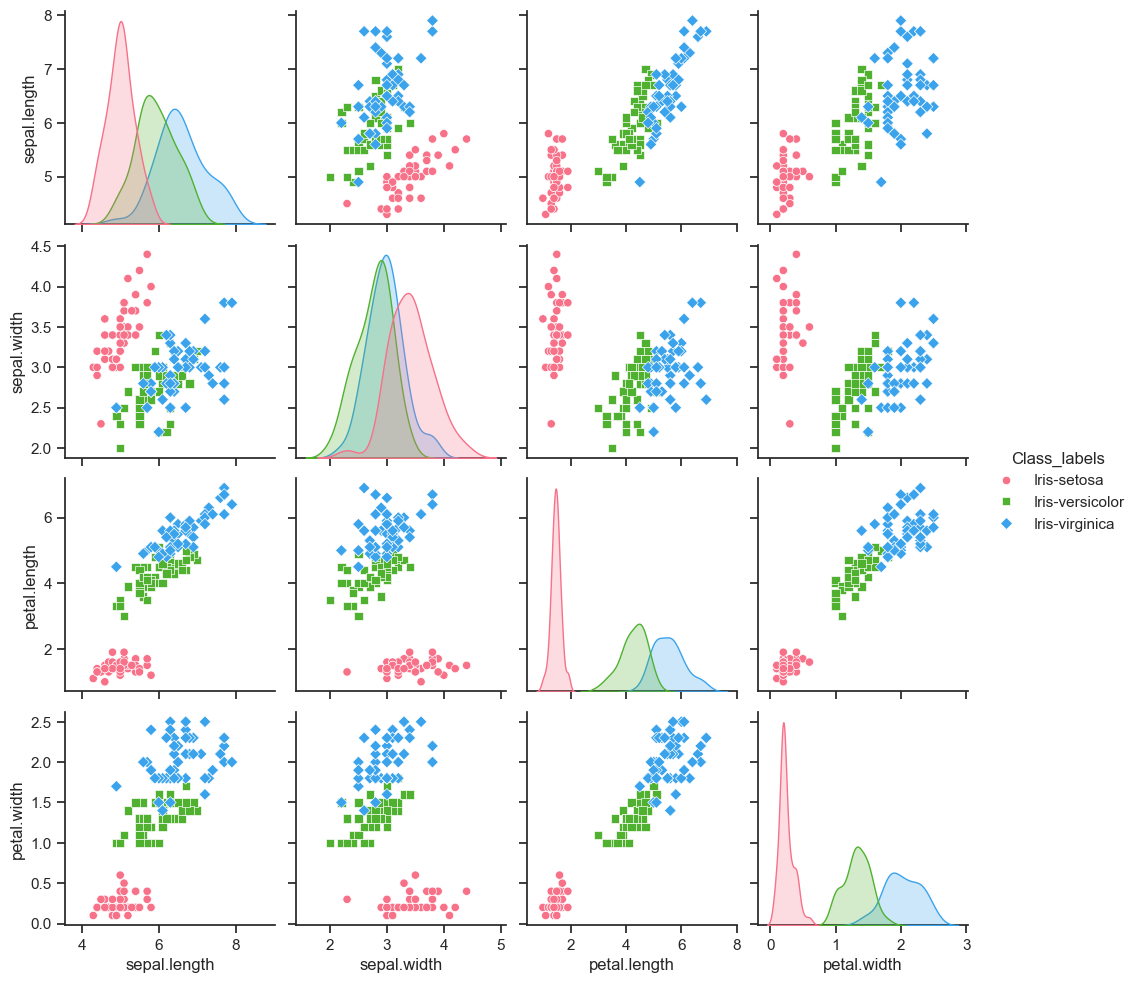

In [16]:
sns.set(style="ticks", color_codes=True)
print(df)
sns.pairplot(df, hue="Class_labels", palette="husl", markers=["o", "s", "D"])
subspecies = df.Class_labels.unique()
color = ['red', 'green', 'blue']

4. Dividir os dados em conjuntos de treino e teste


In [17]:
# Divisão treino/teste (80/20)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

5. Treinar o modelo KNN


In [18]:
knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
knn_model = knn.fit(x_train, y_train)

6. Avaliar o desempenho do modelo


In [19]:
# Avaliação da acurácia
print("Acurácia do modelo:", knn_model.score(x_test, y_test))

# Relatório de classificação
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

# Determinar a quantidade de acertos (acurácia)
acertos = accuracy_score(y_test, y_pred)
print("Acerto médio de classificação: ", acertos)

Acurácia do modelo: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Acerto médio de classificação:  0.9666666666666667


Plano em pseudocódigo:
Definir o intervalo de valores para k.
Inicializar uma lista para armazenar as pontuações.
Loop para cada valor de k no intervalo:
Criar um modelo KNN com o valor atual de k.
Avaliar o modelo usando validação cruzada.
Armazenar a média das pontuações na lista.
Plotar os resultados.

In [20]:
# Definir o intervalo de valores para k
k_range = list(range(1, 50))

# Inicializar uma lista para armazenar as pontuações
scores = []

# Loop para cada valor de k no intervalo
for k in k_range:
    # Criar um modelo KNN com o valor atual de k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Avaliar o modelo usando validação cruzada
    score = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    
    # Armazenar a média das pontuações na lista
    scores.append(score.mean())

# Plotar os resultados
plt.plot(k_range, scores)
plt.xlabel('Valor de k do KNN')
plt.ylabel('Taxa de acertos')
plt.title('Taxa de acertos x valor de k do KNN')
plt.show()

NameError: name 'cross_val_score' is not defined

In [ ]:
# Para determinar a quantidade de acertos (acuracia) ​

df_amostra = df.groupby('Class_labels')[['petal.length','petal.width']].mean()
df_amostra

,petal.length,petal.width
Class_labels,,
Iris-setosa,1.464,0.244
Iris-versicolor,4.260,1.326
Iris-virginica,5.552,2.026


In [ ]:
knn_model.predict([[1.3, 3.2]])

C:\Users\muril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)